In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transformers as tfm

In [32]:
data = pd.read_csv('../data-processer/cleaned_data.csv')
data

,group,month,day,timestamp,text
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ..."
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww..."
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats..."
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ..."
...,...,...,...,...,...
8105,Expats in Tallinn/Estonia,1,1,1641036083000,I've read that in Estonia when walking at nigh...
8106,Expats in Tallinn/Estonia,1,1,1641035056000,Hey people! Yesterday night in a club at Old T...
8107,Expats in Tallinn/Estonia,1,1,1641031238000,Happy New Year Everyone. Please can anyone kin...
8108,Expats in Tallinn/Estonia,1,1,1641028022000,"Hello, I am looking for someone who can create..."


In [13]:
analyse_sentiment = tfm.pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [33]:
test_data = data.loc[data['month'] == 12]
test_data

,group,month,day,timestamp,text
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ..."
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww..."
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats..."
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ..."
...,...,...,...,...,...
664,"Expats in Tallinn, Estonia",12,1,1669885317000,SILENT AUCTION Donated by the Embassy of India...
665,Expats in Tallinn/Estonia,12,1,1669883815000,"Hi guys, I’m planning on making an order for g..."
666,Expats in Tallinn/Estonia,12,1,1669883786000,Gingerbread Mania (Piparkoogimaania) is a fest...
667,Expats in Tallinn/Estonia,12,1,1669879882000,"Does anyone know the process, difficulty level..."


In [34]:
sentiment = analyse_sentiment(data['text'].to_list(), truncation=True, max_length=512)
sentiment

[{'label': 'LABEL_1', 'score': 0.5232200026512146},
 {'label': 'LABEL_1', 'score': 0.6036540865898132},
 {'label': 'LABEL_2', 'score': 0.7404202818870544},
 {'label': 'LABEL_2', 'score': 0.9871047735214233},
 {'label': 'LABEL_1', 'score': 0.9272280335426331},
 {'label': 'LABEL_2', 'score': 0.9908430576324463},
 {'label': 'LABEL_1', 'score': 0.7709282040596008},
 {'label': 'LABEL_2', 'score': 0.9447786211967468},
 {'label': 'LABEL_2', 'score': 0.9429830312728882},
 {'label': 'LABEL_2', 'score': 0.8656668066978455},
 {'label': 'LABEL_2', 'score': 0.8912230134010315},
 {'label': 'LABEL_2', 'score': 0.9354576468467712},
 {'label': 'LABEL_1', 'score': 0.8416734337806702},
 {'label': 'LABEL_1', 'score': 0.40849068760871887},
 {'label': 'LABEL_2', 'score': 0.929298460483551},
 {'label': 'LABEL_2', 'score': 0.9320957064628601},
 {'label': 'LABEL_2', 'score': 0.9243436455726624},
 {'label': 'LABEL_1', 'score': 0.7957248091697693},
 {'label': 'LABEL_1', 'score': 0.5059172511100769},
 {'label': '

In [41]:
result = data.join(pd.DataFrame(sentiment))
result

,group,month,day,timestamp,text,label,score
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ...",LABEL_1,0.523220
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww...",LABEL_1,0.603654
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...,LABEL_2,0.740420
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats...",LABEL_2,0.987105
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ...",LABEL_1,0.927228
...,...,...,...,...,...,...,...
8105,Expats in Tallinn/Estonia,1,1,1641036083000,I've read that in Estonia when walking at nigh...,LABEL_2,0.895676
8106,Expats in Tallinn/Estonia,1,1,1641035056000,Hey people! Yesterday night in a club at Old T...,LABEL_0,0.522011
8107,Expats in Tallinn/Estonia,1,1,1641031238000,Happy New Year Everyone. Please can anyone kin...,LABEL_2,0.978618
8108,Expats in Tallinn/Estonia,1,1,1641028022000,"Hello, I am looking for someone who can create...",LABEL_2,0.891937


In [48]:
senti_label = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive',
}

result['label'] = [senti_label[label] for label in result['label']]
result

,group,month,day,timestamp,text,label,score
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ...",Neutral,0.523220
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww...",Neutral,0.603654
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...,Positive,0.740420
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats...",Positive,0.987105
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ...",Neutral,0.927228
...,...,...,...,...,...,...,...
8105,Expats in Tallinn/Estonia,1,1,1641036083000,I've read that in Estonia when walking at nigh...,Positive,0.895676
8106,Expats in Tallinn/Estonia,1,1,1641035056000,Hey people! Yesterday night in a club at Old T...,Negative,0.522011
8107,Expats in Tallinn/Estonia,1,1,1641031238000,Happy New Year Everyone. Please can anyone kin...,Positive,0.978618
8108,Expats in Tallinn/Estonia,1,1,1641028022000,"Hello, I am looking for someone who can create...",Positive,0.891937


In [49]:
result.to_csv('sentiment_output.csv')

<Axes: xlabel='label'>

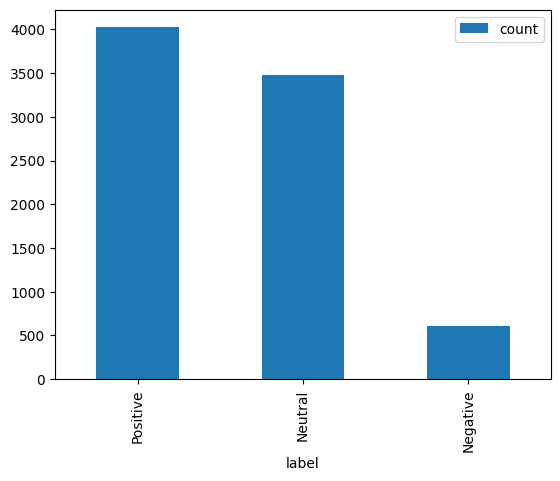

In [50]:
result.groupby('label').text.count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head(20).reset_index(drop=True) \
        .plot.bar(x='label')

In [54]:
result.loc[result['label'] == 'Negative']['text'].to_list()

["This is the worst version of Airan I have ever took a sip of. It is so bad that it would've been served as a torture drink if made during WW2. I don't know how even it found the shelves with this taste man, such a disappointment!  Just a public service message to stay away from this poison. 🙂",
 "Hello,  I am beyond frustrated and maybe some of you can offer help! Our family dr is moving to another clinic and apparently this means we have to move with him. The clinic is being very unhelpful and i really liked the dr but jot enough to go to a clinic that is quite far from where we live. Do you know any English speaking clinics that may take us in the city center? I seriously don't understand why if the dr is changing jobs I have to move with him without any choice :( Thank you!",
 'Hi, anyone knows where to order some leather for handcraft from Estonia local shops? I tired Amazon, but quality is not so good 🥲',
 "What do people do about those parking tickets in shopping centres that y